Loan data From Lending Club

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

Data Exploration

In [2]:
url = 'C:/Users/Qiulan/.spyder/LoanStats_2017Q2.csv'
df = pd.read_csv(url, skiprows = 1, low_memory = False)
df.shape

(105453, 137)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105453 entries, 0 to 105452
Columns: 137 entries, id to hardship_last_payment_amount
dtypes: float64(111), object(26)
memory usage: 110.2+ MB


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,NaN,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8000.0,8000.0,8000.0,36 months,14.08%,273.74,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26000.0,26000.0,26000.0,36 months,9.93%,838.10,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,18950.0,18950.0,18950.0,60 months,21.45%,517.47,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,9600.0,9600.0,9600.0,36 months,7.97%,300.70,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete columns that have missing values more than 80%

In [5]:
cols = [c for c in df.columns if (df[c].isnull().sum())/len(df[c]) < 0.8]
print(len(cols))

104


Delete columns that have only one unique value

In [6]:
cols1 = [c for c in df.columns if len(df[c].dropna().unique()) ==1]
cols2 = [c for c in cols if c not in cols1]
df = df[cols2]

Delete rows that have missing values more than 80%

In [7]:
df.drop([105451, 105452], inplace = True)

In [8]:
print(df.dtypes.unique())

[dtype('float64') dtype('O')]


Explore potential columns that can be converted to numerical from 'np.object'

In [9]:
col4 = df.select_dtypes(include = ['O']).columns
col4

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

Delete non-informative columns using business insights

In [10]:
col5 = ['earliest_cr_line','last_pymnt_d','next_pymnt_d',
        'last_credit_pull_d', 'initial_list_status','emp_title', 'zip_code', 'issue_d']
df.drop(col5, axis = 1, inplace = True)

In [11]:
col6 = [c for c in col4 if c not in col5]
df[col6].head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,title,addr_state,revol_util,application_type
0,60 months,12.62%,C,C1,10+ years,MORTGAGE,Not Verified,Current,debt_consolidation,Debt consolidation,MA,105.8%,INDIVIDUAL
1,36 months,14.08%,C,C3,9 years,RENT,Verified,Current,vacation,Vacation,NJ,86.7%,INDIVIDUAL
2,36 months,9.93%,B,B2,7 years,OWN,Not Verified,Current,home_improvement,Home improvement,DE,12.4%,INDIVIDUAL
3,60 months,21.45%,D,D5,1 year,MORTGAGE,Verified,Current,credit_card,Credit card refinancing,CA,98%,INDIVIDUAL
4,36 months,7.97%,A,A5,< 1 year,OWN,Not Verified,Current,credit_card,Credit card refinancing,NM,48.6%,INDIVIDUAL


In [12]:
col6 = ['int_rate', 'revol_util']
df[col6] = df[col6].replace('%', '', regex = True).astype('float')/100
df.term = df.term.str.strip('months').astype('float')

In [13]:
df.emp_length.replace('n/a', np.nan, inplace = True)
df.emp_length.fillna(value=0,inplace=True)
df.emp_length.replace(to_replace='[^0-9]+', value='', inplace = True,  regex=True)
df.emp_length = df.emp_length.astype(int)
df.emp_length.head()

0    10
1     9
2     7
3     1
4     1
Name: emp_length, dtype: int32

In [14]:
col7 = df.select_dtypes(include = ['O']).columns
df[col7].head()

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,title,addr_state,application_type
0,C,C1,MORTGAGE,Not Verified,Current,debt_consolidation,Debt consolidation,MA,INDIVIDUAL
1,C,C3,RENT,Verified,Current,vacation,Vacation,NJ,INDIVIDUAL
2,B,B2,OWN,Not Verified,Current,home_improvement,Home improvement,DE,INDIVIDUAL
3,D,D5,MORTGAGE,Verified,Current,credit_card,Credit card refinancing,CA,INDIVIDUAL
4,A,A5,OWN,Not Verified,Current,credit_card,Credit card refinancing,NM,INDIVIDUAL


Check the unique value for categorical variables

In [15]:
def unique_count(df, cols):
    dict = {}
    for i in cols:
        dict[i] = len(df[i].unique())
    return dict

unique_count(df, list(col7))


{'addr_state': 49,
 'application_type': 3,
 'grade': 7,
 'home_ownership': 5,
 'loan_status': 6,
 'purpose': 13,
 'sub_grade': 35,
 'title': 12,
 'verification_status': 3}

Plot Loan_status, which is target variable

In [16]:
df.loan_status.value_counts()

Current               99850
Fully Paid             3896
In Grace Period         932
Late (31-120 days)      436
Late (16-30 days)       312
Charged Off              25
Name: loan_status, dtype: int64

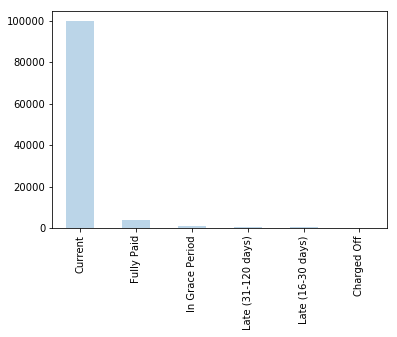

In [17]:
df.loan_status.value_counts().plot(kind='bar',alpha=.30)
plt.show()

Remove samples whose Loan_status is 'current'

In [18]:
print(df.shape)
df = df[df.loan_status != 'Current']
print(df.shape)

(105451, 91)
(5601, 91)


Group samples whose Loan_status is not 'fully paid' as default

In [19]:
df.reset_index(inplace = True)

In [20]:
df.loan_status = df.loan_status.apply(lambda x: 0 if x.find('Fully Paid')==0 else 1)

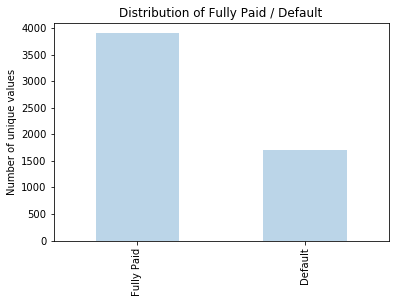

In [21]:
df.loan_status.value_counts().plot(kind = 'bar', alpha = 0.30)
plt.xticks((0, 1), ('Fully Paid', 'Default'))
plt.ylabel('Number of unique values')
plt.title('Distribution of Fully Paid / Default')
plt.show()

Calculate the raio of Fully paid to default. Result is 2.3, so we don't have sevious imbalanced data problem

In [22]:
ratio = (df.loan_status.count() - df.loan_status.sum()) / df.loan_status.sum()
print(ratio)

2.285043988269795


Using Pipeline to build the model

Create lists that contain categorical, and numerical data, respectively

In [23]:
CATEG_COLUMNS = list(set(list(col7)) - set(['loan_status']))
print(CATEG_COLUMNS)

['grade', 'addr_state', 'title', 'home_ownership', 'application_type', 'verification_status', 'sub_grade', 'purpose']


In [24]:
NUMERIC_COLUMNS = list(set(list(df.columns) ) - set(CATEG_COLUMNS))
print(len(NUMERIC_COLUMNS))

84


Perform preprocessing

Bi-variate Analysis

Continuous & Continuous: examine correlation matrix and drop highly correlated data to address multicollinearity. (plot the heatmap when you are free)

In [25]:
def drop_corr(df, threshold = 0.95):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    return to_drop

In [26]:
drop_corr_num = drop_corr(df[NUMERIC_COLUMNS], threshold = 0.95)
print(len(drop_corr_num))

11


In [28]:
NUMERIC_COLUMNS = list(set(NUMERIC_COLUMNS) - set(drop_corr_num))
print(len(NUMERIC_COLUMNS))

73


In [27]:
# Import preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest

# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
#Define get_categ_column()
def get_categ_column(df, cols = CATEG_COLUMNS):
    dummies = pd.get_dummies(df[cols], drop_first = True, prefix_sep = '_')
    return dummies

In [51]:
def get_categ_column(df, cols = CATEG_COLUMNS):
    return df[cols]

In [43]:
get_categ_data = FunctionTransformer(get_categ_column, validate = False)

In [31]:
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate = False)

Write a Transformer that does the column selection 

Create pipeline for categorical feature

In [421]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns= None):
        self.columns = columns
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X[self.columns]


In [423]:
class ColumnImputer(BaseEstimator, TransformerMixin):
    """Impute missing values.
    Columns of dtype object are imputed with the most frequent value 
    in column.
    Columns of other types are imputed with mean of column.
    Credits: http://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
    """

    def __init__(self, strategy="mean"):
        self.strategy = strategy

    def fit(self, X, y=None):
        if X.dtype == np.dtype("O"):
            X = X.astype("str")
        # Get Fill Counts and store the frequent value
        values, counts = np.unique(X.astype("str"), return_counts=True)
        self.fill = values[np.argmax(counts)]
        
        return self

    def transform(self, X, y=None):
        if X.dtype == np.dtype("O"):
            nan_idxs = np.where(X.astype("str") == 'nan')
        else:
            nan_idxs = np.where(np.isnan(X))
        X[nan_idxs] = self.fill
        return X

In [425]:

pl_categ = Pipeline([ ('selector', get_categ_column),
                    ('labeler', ColumnImputer(strategy = 'most_frequent')),
                    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))]
                    )

TypeError: All intermediate steps should be transformers and implement fit and transform. '<function get_categ_column at 0x000000001C1D02F0>' (type <class 'function'>) doesn't

In [55]:
pl_categ = Pipeline([ ('selector', get_categ_column),
                     ('LabelEncoder', LabelEncoder()),
                    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))]
                    )

In [ ]:
pl_categ = Pipeline([ ('selector', TypeSelector('category')),
                    ('labeler', StringIndexer()),
                    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))]
                    )

In [ ]:
pl_categ = P

Create pipeline for numeric feature

In [32]:
pl_num = Pipeline([ ('selector', get_numeric_data),                   
                   ('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)),
                  ('scaler', StandardScaler())])

FeatureUnion

In [40]:
from sklearn.pipeline import FeatureUnion
process_and_join_features = FeatureUnion(
            transformer_list = [('categ_features', get_categ_data),
                ('numeric_features', pl_num)
            ]
)

Create train and test sets

In [41]:
y = df['loan_status']

In [34]:
X = df[NUMERIC_COLUMNS].copy()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42,
                                                   stratify = y)

In [36]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)


Instantiate nested pipeline: pl

In [348]:
pl = Pipeline([
    ('union', process_and_join_features),    
    ('clf', logreg_cv),
])

In [37]:
pl = Pipeline([('pl_num', pl_num),    
    ('clf', logreg_cv)])

Fit to the training data

In [38]:
pl.fit(X_train, y_train)


Pipeline(steps=[('pl_num', Pipeline(steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x0000000022A0A620>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', ...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])

In [39]:
pl.score(X_test, y_test)

1.0